In [1]:
using ReinforcementLearning, ReinforcementLearningEnvironments

┌ Info: Precompiling ReinforcementLearning [158674fc-8238-5cab-b5ba-03dfc80d1318]
└ @ Base loading.jl:1264


In [2]:
using RLIntro, RLIntro.CliffWalking

┌ Info: Precompiling RLIntro [02c1da58-b9a1-11e8-0212-f9611b8fe936]
└ @ Base loading.jl:1264
┌ Warning: Package RLIntro does not have StatsBase in its dependencies:
│ - If you have RLIntro checked out for development and have
│   added StatsBase as a dependency but haven't updated your primary
│   environment's manifest file, try `Pkg.resolve()`.
│ - Otherwise you may need to report an issue with RLIntro
└ Loading StatsBase into RLIntro from project dependency, future warnings for RLIntro are suppressed.


In [3]:
using Plots

In [4]:
using StatsBase

In [5]:
env = CliffWalkingEnv()
ns = length(observation_space(env))
na = length(action_space(env))

4

In [6]:
create_ExpectedSARSA_agent(α) = Agent(
    π=QBasedPolicy(
        learner=TDLearner(
            approximator=TabularQApproximator(n_state=ns, n_action=na),
            optimizer=Descent(α),
            method=:ExpectedSARSA
        ),
        selector=EpsilonGreedySelector(0.1)
    ),
    buffer= episode_RTSA_buffer()
)

create_Q_agent(α) = Agent(
    π=QBasedPolicy(
        learner=TDLearner(
            approximator=TabularQApproximator(n_state=ns, n_action=na),
            optimizer=Descent(α),
            method=:SARS
        ),
        selector=EpsilonGreedySelector(0.1)
    ),
    buffer= episode_RTSA_buffer()
)

create_SARSA_agent(α) = Agent(
    π=QBasedPolicy(
        learner=TDLearner(
            approximator=TabularQApproximator(n_state=ns, n_action=na),
            optimizer=Descent(α),
            method=:SARSA
        ),
        selector=EpsilonGreedySelector(0.1)
    ),
    buffer= episode_RTSA_buffer()
)

create_SARSA_agent (generic function with 1 method)

In [37]:
function repeated_run(agent_creater, n, episode, is_mean=true)
    env = CliffWalkingEnv()
    rewards = []
    for _ in 1:n
        hook = TotalRewardPerEpisode()
        run(agent_creater(), env, StopAfterEpisode(episode;is_show_progress=false);hook=hook)
        push!(rewards, is_mean ? mean(hook.rewards) : hook.rewards)
    end
    mean(rewards)
end

repeated_run (generic function with 2 methods)

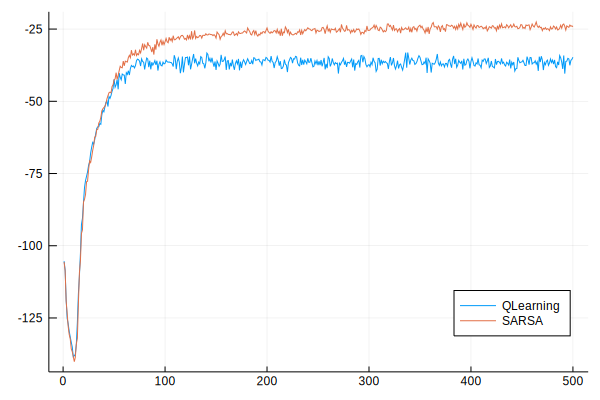

In [44]:
p = plot(legend=:bottomright)
plot!(p, repeated_run(() -> create_Q_agent(0.5), 1000, 500, false), label="QLearning")
plot!(p, repeated_run(() -> create_SARSA_agent(0.5), 1000, 500, false), label="SARSA")
p

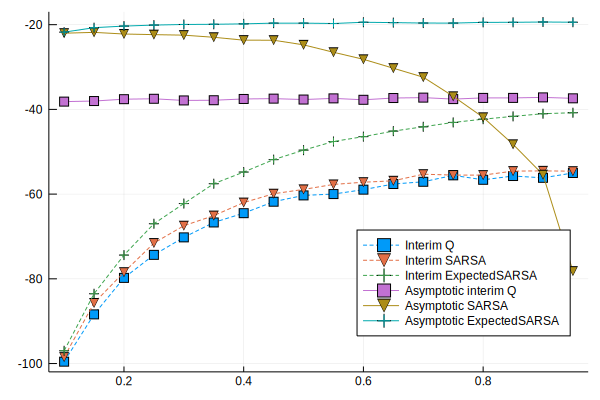

In [33]:
A = 0.1:0.05:0.95
p = plot(;legend=:bottomright)

plot!(p, A, [repeated_run(() -> create_Q_agent(α), 100, 100) for α in A], linestyle=:dash ,markershape=:rect, label="Interim Q")
plot!(p, A, [repeated_run(() -> create_SARSA_agent(α), 100, 100) for α in A], linestyle=:dash, markershape=:dtriangle, label="Interim SARSA")
plot!(p, A, [repeated_run(() -> create_ExpectedSARSA_agent(α), 100, 100) for α in A], linestyle=:dash, markershape=:cross, label="Interim ExpectedSARSA")

plot!(p, A, [repeated_run(() -> create_Q_agent(α), 10, 5000) for α in A], linestyle=:solid ,markershape=:rect, label="Asymptotic interim Q")
plot!(p, A, [repeated_run(() -> create_SARSA_agent(α), 10, 5000) for α in A], linestyle=:solid, markershape=:dtriangle, label="Asymptotic SARSA")
plot!(p, A, [repeated_run(() -> create_ExpectedSARSA_agent(α), 10, 5000) for α in A], linestyle=:solid, markershape=:cross, label="Asymptotic ExpectedSARSA")